<a href="https://colab.research.google.com/github/themysterysolver/PYTHON_BASICS/blob/main/SOFT_COMPUTING/MAMDAN_TSK_2022503003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


## **Question 1: Mamdani Fuzzy Model**

**Title:** *Design a Mamdani Fuzzy Inference System for Fan Speed Control*

**Problem Statement:**

Design a **Mamdani Fuzzy Inference System** to control the speed of a fan based on the **temperature** and **humidity** of a room. The system should:

1. Take **Temperature** (0–40°C) and **Humidity** (0–100%) as input variables.
2. Output **Fan Speed** (0–10).
3. Use **triangular membership functions** for inputs and outputs:

   * Temperature: *cold, warm, hot*
   * Humidity: *dry, comfortable, humid*
   * Fan Speed: *low, medium, high*
4. Define fuzzy rules such as:

   * IF temperature is cold OR humidity is dry THEN fan speed is low
   * IF temperature is warm AND humidity is comfortable THEN fan speed is medium
   * IF temperature is hot OR humidity is humid THEN fan speed is high
5. Compute the **defuzzified output** for a given temperature and humidity.
6. Plot the **membership functions** and **indicate the computed fan speed** on the graph.

- Given temp=28 and hum = 65 calculate the crisp value!








R.Prabhakara Arjun
2022503003
Calculated Fan Speed (Mamdani) = 5.701456310679611


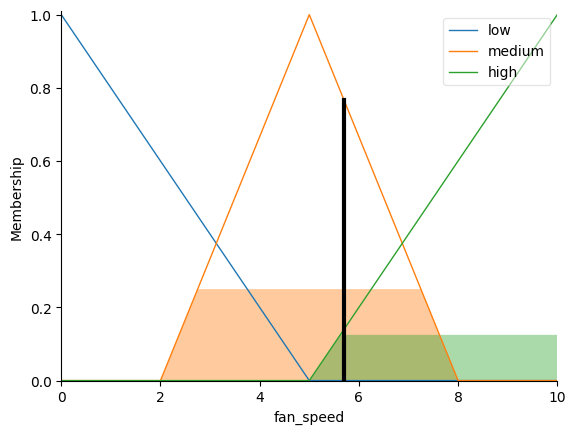

In [3]:
print("R.Prabhakara Arjun\n2022503003")

'''Remeebr exclusive range'''
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
fan_speed = ctrl.Consequent(np.arange(0, 11, 1), 'fan_speed')


temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['warm'] = fuzz.trimf(temperature.universe, [15, 25, 35])
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 40, 40])


humidity['dry'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['comfortable'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['humid'] = fuzz.trimf(humidity.universe, [60, 100, 100])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 5])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [2, 5, 8])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [5, 10, 10])


rule1 = ctrl.Rule(temperature['cold'] | humidity['dry'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['warm'] & humidity['comfortable'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['hot'] | humidity['humid'], fan_speed['high'])


fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
fan_sim = ctrl.ControlSystemSimulation(fan_ctrl)

#as per q!!
fan_sim.input['temperature'] = 28
fan_sim.input['humidity'] = 65


fan_sim.compute()
print(f"Calculated Fan Speed (Mamdani) = {fan_sim.output['fan_speed']}")

fan_speed.view(sim=fan_sim)
plt.show()

## **Question 2: Takagi–Sugeno (TS) Fuzzy Model**

**Title:** *Design a Takagi–Sugeno Fuzzy Inference System for Fan Speed Control*

**Problem Statement:**

Design a **Takagi–Sugeno (TS) Fuzzy Inference System** to control the speed of a fan using the **same inputs** as the Mamdani system. The system should:

1. Take **Temperature** (0–40°C) and **Humidity** (0–100%) as inputs.
2. Output **Fan Speed** (0–10) directly as a **crisp value**.
3. Use **triangular membership functions** for inputs:

   * Temperature: *cold, warm, hot*
   * Humidity: *dry, comfortable, humid*
4. Define fuzzy rules such as:

   * IF temperature is cold OR humidity is dry THEN fan speed = 2
   * IF temperature is warm AND humidity is comfortable THEN fan speed = 5
   * IF temperature is hot OR humidity is humid THEN fan speed = 8
5. Compute the **weighted average** of the rule outputs to get the final crisp fan speed.
6. Plot the membership functions of inputs and indicate the contribution of each rule.

- Given temp=28 and hum = 65 calculate the crisp value!

In [6]:
print("R.Prabhakara Arjun\n2022503003")

temp = 28
hum = 65

def trimf(x, a, b, c):
    return np.maximum(np.minimum((x-a)/(b-a), (c-x)/(c-b)), 0)


temp_cold = trimf(temp, 0, 10, 20)
temp_warm = trimf(temp, 15, 25, 35)
temp_hot  = trimf(temp, 30, 35, 40)

hum_dry       = trimf(hum, 0, 25, 50)
hum_comf      = trimf(hum, 30, 50, 70)
hum_humid     = trimf(hum, 60, 80, 100)

#TSK rules
rule1_strength = max(temp_cold, hum_dry)
rule2_strength = min(temp_warm, hum_comf)
rule3_strength = max(temp_hot, hum_humid)

# Avoid division by zero
weight_sum = rule1_strength + rule2_strength + rule3_strength
if weight_sum == 0:
    fan_speed_ts = 0
else:
    fan_speed_ts = (rule1_strength*2 + rule2_strength*5 + rule3_strength*8) / weight_sum

print(f"Calculated Fan Speed (TS Model) = {fan_speed_ts:.2f}")


R.Prabhakara Arjun
2022503003
Calculated Fan Speed (TS Model) = 6.50
